<div style='
    background-color:black;
    color:white;
    border-radius:10px; 
    padding:10px;
    '>
    <h1 style='
     color:yellow;
     text-decoration:underline;
     font-weight:bold;
     font-style:italic;
    '>Logistic Regression Implementation</h1>
    <ul>
        <li>Name: <b>Zohaib Khan</b></li>
        <li>Class Number: <b>BSCS-221335</b></li>
        <li>Section: <b>A</b></li>
        <li>Subject: <b>Computer Science</b></li>
        <li>Course: <b>Artificial Intelligence</b></li>
        <li>Professor: <b>Dr Muhammad Sajad</b></li>
        <li>Semester: <b>6th</b></li>
        <li>Assignment: <b> 02 ( Part-II )</b></li>
        <li><b><i>ISLAMIA COLLEGE PESHAWER</i></b></li>
    </ul>
</div>
<div>
    <h2>Dataset Explanation</h2>
    <p>
        This dataset is designed to predict whether a student will <b>pass</b> or <b>fail</b> a course. The prediction is based on the following features:
        <ul>
            <li><b>Study Hours:</b> Average daily study time.</li>
            <li><b>Attendance:</b> Percentage of classes attended.</li>
            <li><b>GPA:</b> Grade Point Average, reflecting academic performance.</li>
            <li><b>Parent Education:</b> Whether parents have a higher education qualification (0: No, 1: Yes).</li>
        </ul>
        By analyzing these factors, the logistic regression model aims to predict whether a student will pass or fail.
    </p>
<h2>What Will Be Predicted?</h2>
<p>
    The model will predict the likelihood (as a probability) that a student will <b>pass</b> the course. If the probability is above a certain threshold (e.g., 0.5), the prediction will be "Pass"; otherwise, it will be "Fail".
</p>

<h2>Regularization Problem</h2>
<p>
    The dataset has a potential <b>regularization problem</b> due to <b>multicollinearity</b> between <b>Study Hours</b> and <b>GPA</b>. Since GPA is partially derived from study hours, these features are highly correlated. This correlation can cause logistic regression to give high weights to both variables, leading to <b>overfitting</b>. Applying techniques like <b>Ridge</b> or <b>Lasso regression</b> can mitigate this problem by penalizing large coefficients.
</p>
</div>

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("Data-Files/CoursePassingAndFail.csv")
dataset

,Study_Hours,Attendance,GPA,Parent_Education,Pass
0,4.37,95.41,1.77,0,1
1,9.56,61.98,4.09,1,1
2,7.59,57.24,3.31,1,1
3,6.39,74.47,2.87,0,1
4,2.40,99.28,1.32,0,1
...,...,...,...,...,...
145,1.33,76.11,1.01,0,1
146,6.49,88.50,3.09,0,1
147,5.52,60.79,2.59,0,1
148,1.46,81.14,0.77,0,1


In [3]:
def scale_feature(feature):
    max_val = max(feature)
    print(max_val)
    scaled_feature = [val/max_val for val in feature]
    return scaled_feature
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def compute_cost(x,y,w):
    m = len(y)
    h = sigmoid(x @ w)
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost.item()
def compute_gradient(x,y,w):
    m = len(y)
    h = sigmoid(x @ w)
    gradient = (1/m) * (x.T @ (h - y))
    return gradient    

In [4]:
std_hrs = dataset["Study_Hours"].tolist()
attendance = dataset["Attendance"].tolist()
parent_education = dataset["Parent_Education"].tolist()
gpa = dataset["GPA"].tolist()
is_pass = dataset["Pass"].tolist()

In [5]:
x1 = np.array(scale_feature(std_hrs)).reshape(-1,1)
x2 = np.array(scale_feature(attendance)).reshape(-1,1)
x3 = np.array(scale_feature(gpa)).reshape(-1,1)
x4 = np.array(parent_education).reshape(-1,1)
y = np.array(is_pass).reshape(-1,1)

9.88
99.5
4.22


In [6]:
x = np.column_stack((np.ones(150),x1,x2,x3,x4))
print(x.shape)
print(x.size)

(150, 5)
750


In [7]:
def train_model(w,x,y,iters,lr):
    costs = []
    epochs = []
    for i in range(iters):
        epochs.append(i)
        costs.append(compute_cost(x,y,w))
        w -= lr * compute_gradient(x,y,w)
    return epochs,costs    

In [8]:
w = np.zeros((5,1))
e,c = train_model(w,x,y,1000,0.0001)
w = np.zeros((5,1))
e2,c2 = train_model(w,x,y,1000,0.001)
w = np.zeros((5,1))
e3,c3 = train_model(w,x,y,1000,0.01)
w = np.zeros((5,1))
e4,c4 = train_model(w,x,y,1000,0.1)

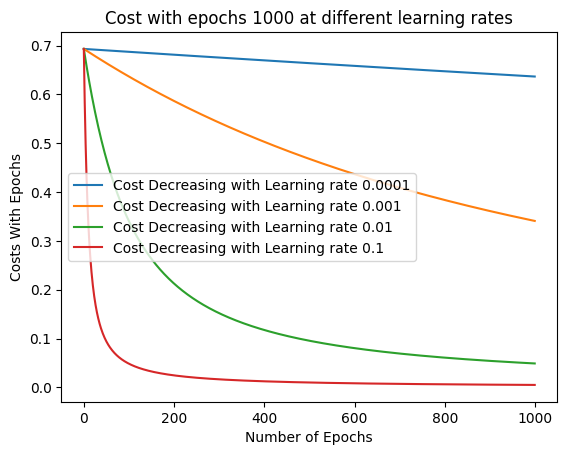

In [9]:
import matplotlib.pyplot as plt
plt.plot(e,c,label='Cost Decreasing with Learning rate 0.0001')
plt.plot(e2,c2,label='Cost Decreasing with Learning rate 0.001')
plt.plot(e3,c3,label='Cost Decreasing with Learning rate 0.01')
plt.plot(e4,c4,label='Cost Decreasing with Learning rate 0.1')
plt.title("Cost with epochs 1000 at different learning rates")
plt.xlabel("Number of Epochs")
plt.ylabel("Costs With Epochs")
plt.legend()
plt.show()

In [10]:
sigmoid(x[3] @ w)

array([0.99540803])

<h1>Implementation with Regularization</h1>
<h2>1. Sigmoid Function</h2>
<p>The sigmoid function is defined as:</p>
<pre>
    sigmoid(z) = 1 / (1 + exp(-z))
</pre>
<p>It squashes the input value <strong>z</strong> into a range between 0 and 1, making it suitable for binary classification tasks, where the output is a probability.</p>

<h2>2. Regularized Cost Function</h2>
<p>The cost function with L2 regularization is:</p>
<pre>
    J(w) = (-1 / m) * Σ [y(i) * log(h(x(i))) + (1 - y(i)) * log(1 - h(x(i)))] 
         + (λ / (2m)) * Σ w(j)^2
</pre>
<p>Where:</p>
<ul>
    <li>h(x(i)) = sigmoid(x(i) * w)</li>
    <li>w is the vector of model parameters (weights), and λ is the regularization parameter.</li>
    <li>m is the number of training examples.</li>
</ul>
<p>The regularization term <strong>(λ / (2m)) * Σ w(j)^2</strong> helps to prevent overfitting by penalizing large weights (except for the bias term).</p>

<h2>3. Regularized Gradient Function</h2>
<p>The gradient of the cost function with L2 regularization is:</p>
<pre>
    ∇J(w) = (1 / m) * Xᵀ * (h - y) + (λ / m) * w
</pre>
<p>Where:</p>
<ul>
    <li>h is the sigmoid of the linear combination of features and weights (h = sigmoid(X * w)).</li>
    <li>λ is the regularization parameter.</li>
</ul>
<p>The regularization term <strong>(λ / m) * w</strong> applies the penalty to the weights, and <strong>w[0]</strong> (the bias term) is not regularized.</p>

In [11]:
def compute_cost(x, y, w, reg_lambda):
    m = len(y)
    h = sigmoid(x @ w)
    reg_term = (reg_lambda / (2 * m)) * np.sum(np.square(w[1:]))
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) + reg_term
    return cost.item()
    
def compute_gradient(x, y, w, reg_lambda):
    m = len(y)
    h = sigmoid(x @ w)
    reg_term = (reg_lambda / m) * w
    reg_term[0] = 0 
    gradient = (1 / m) * (x.T @ (h - y)) + reg_term
    return gradient

In [12]:
def train_model(w,x,y,iters,lr,lmbda):
    costs = []
    epochs = []
    for i in range(iters):
        epochs.append(i)
        costs.append(compute_cost(x,y,w,lmbda))
        w -= lr * compute_gradient(x,y,w,lmbda)
    return epochs,costs 

In [13]:
w = np.zeros((5,1))
e,c = train_model(w,x,y,1000,0.01,25)
w = np.zeros((5,1))
e2,c2 = train_model(w,x,y,1000,0.01,50)
w = np.zeros((5,1))
e3,c3 = train_model(w,x,y,1000,0.01,75)
w = np.zeros((5,1))
e4,c4 = train_model(w,x,y,1000,0.01,100)

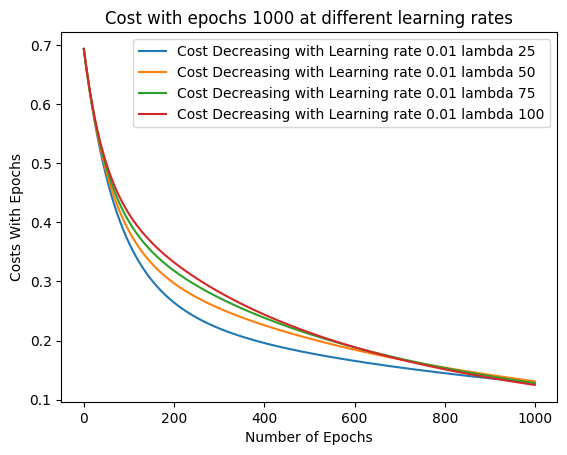

In [14]:
plt.plot(e,c,label='Cost Decreasing with Learning rate 0.01 lambda 25')
plt.plot(e2,c2,label='Cost Decreasing with Learning rate 0.01 lambda 50')
plt.plot(e3,c3,label='Cost Decreasing with Learning rate 0.01 lambda 75')
plt.plot(e4,c4,label='Cost Decreasing with Learning rate 0.01 lambda 100')
plt.title("Cost with epochs 1000 at different learning rates")
plt.xlabel("Number of Epochs")
plt.ylabel("Costs With Epochs")
plt.legend()
plt.show()

In [15]:
w

array([[1.90346942],
       [0.09283692],
       [0.1360044 ],
       [0.09749539],
       [0.08247811]])

In [17]:
sigmoid(x[3] @ w)

array([0.89393778])